   ID number  Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0     842302          4        17.99         10.38          122.80     1001.0   
1     842517          4        20.57         17.77          132.90     1326.0   
2   84300903          4        19.69         21.25          130.00     1203.0   
3   84348301          4        11.42         20.38           77.58      386.1   
4   84358402          4        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst radius  worst texture  worst perimet

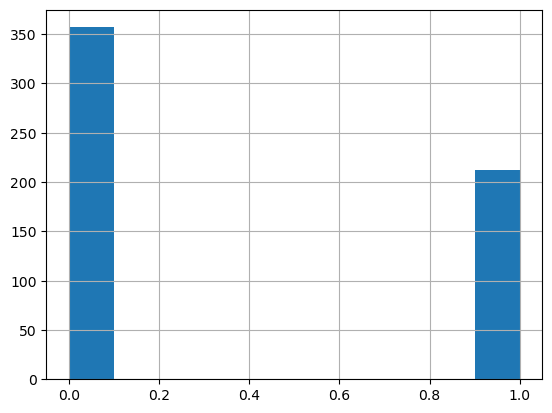

In [9]:
import pandas as pd   #library for data-processing
import numpy as np   #lbrary for linear Algebra
import matplotlib.pyplot as plt   #library for plotting graphs
import seaborn as sns
%matplotlib inline

import warnings            # To suppress unnecessary/irrelevant warnings during execution of the code (run-time).
warnings.filterwarnings('ignore')

data = "D:\CDAC Internship 2023\Breast_Cancer_Dataset\wdbc.csv"  # Dataset is in form of a CSV File.   
df = pd.read_csv(data) 
print(df.head())
df.Diagnosis = [1 if each == 4 else 0 for each in df.Diagnosis]
df['Diagnosis'].hist()

# To calculate prior probabilities of each category(2 of them) from the historical data (Dataset Provided)
def Calculate_Prior_Probability(df,Y):
    classes=sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

# Calculating the Conditional Probability : P(X|Y) i.e. What is the probability that for a given categorical output, what was the
# feature associated for the same.
# Assuming the distribution to be Normal.
def Calculate_Likelihood_Gaussian(df, feature_name,feature_value,Y,label):
    feature=list(df.columns)
    df=df[df[Y]==label]
    mean = df[feature_name].mean()
    standard_deviation = df[feature_name].std()
    Probability_X_given_Y =  (1/(np.sqrt(2*np.pi)*standard_deviation))*np.exp(-((feature_value-mean)**2/
                                                                                (2*standard_deviation**2)))
    return Probability_X_given_Y

# Algorithm. We are trying to find out that value of Y (set of categorical outputs) for which the expression : P(X|Y)*P(Y) is 
# maximum.
def naive_bayes_guassian(df,X,Y):
    features = list(df.columns[2:])
    prior_probability = Calculate_Prior_Probability(df,Y)
    Y_Predicted = []
    for x in X:
        labels=sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]=likelihood[j]*Calculate_Likelihood_Gaussian(df,features[i],x[i],Y,labels[j])
        posterior_probability = [1]*len(labels)
        for j in range(len(labels)):
            posterior_probability[j] = likelihood[j]*prior_probability[j]
            
        Y_Predicted.append(np.argmax(posterior_probability)) 
    return np.array(Y_Predicted)


#Evaluating our model

from sklearn.model_selection import train_test_split

Training_Data,Testing_Data = train_test_split(df,test_size=0.2,random_state=42)
Features_Testing_Data = Testing_Data.iloc[:, 2:].values
Target_Testing_Data = Testing_Data.iloc[:, 1].values
Target_Predicted = naive_bayes_guassian(Training_Data,X=Features_Testing_Data,Y='Diagnosis')


from sklearn.metrics import confusion_matrix, accuracy_score

confusion = confusion_matrix(Target_Testing_Data, Target_Predicted)
print(confusion)

TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

accuracy = accuracy_score(Target_Testing_Data, Target_Predicted)

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Accuracy:", accuracy)
